In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
import os
# Location of Zip File
drive_path = "/content/gdrive/MyDrive/Colab Notebooks/GSoC"
os.chdir(drive_path)
!unzip -q 'dataset'

replace dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train_dir = "/content/gdrive/MyDrive/Colab Notebooks/GSoC/dataset/train"
val_dir = "/content/gdrive/MyDrive/Colab Notebooks/GSoC/dataset/val"

In [ ]:
# train_data = datasets.ImageFolder(train_dir,transform=transform)
import numpy as np
from skimage.transform import resize

def npy_loader(path):
    img = np.load(path)
    # img_arr = np.reshape(img,(150,150,1))
    ig = resize(img, (1,224, 224))
    image = ig.repeat(3,axis=-3)
    tensor = torch.from_numpy(image).float()
    return tensor
    
dataset = datasets.DatasetFolder(root=train_dir,loader=npy_loader,extensions=['.npy'])
val = datasets.DatasetFolder(root=val_dir,loader=npy_loader,extensions=['.npy'])
train_loader = torch.utils.data.DataLoader(dataset,shuffle=True, batch_size=32, num_workers=2)
val_loader = torch.utils.data.DataLoader(val,shuffle=True, batch_size=32, num_workers=2)

In [ ]:
#Now using the AlexNet
ResNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
#Model description
ResNet_model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.nn as nn
ResNet_model.fc = nn.Linear(512,3)
ResNet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# ResNet_model.to(device)

cuda:0


In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(ResNet_model.parameters(), lr=0.0001, momentum=0.9)
optimizer = optim.Adam(ResNet_model.parameters(), lr=0.00001)

In [ ]:
for epoch in range(6):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, la   bels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = ResNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training of ResNet')


[1,   100] loss: 0.055137027
[1,   200] loss: 0.054934496
[1,   300] loss: 0.054543610
[1,   400] loss: 0.053199250
[1,   500] loss: 0.050141810
[1,   600] loss: 0.046940000
[1,   700] loss: 0.046853550
[1,   800] loss: 0.045158653
[1,   900] loss: 0.043765817
[2,   100] loss: 0.041643721
[2,   200] loss: 0.040650700
[2,   300] loss: 0.040565341
[2,   400] loss: 0.039754480
[2,   500] loss: 0.038651757
[2,   600] loss: 0.037590079
[2,   700] loss: 0.036563935
[2,   800] loss: 0.037599390
[2,   900] loss: 0.034775933
[3,   100] loss: 0.034578666
[3,   200] loss: 0.035102420
[3,   300] loss: 0.033044048
[3,   400] loss: 0.034722624
[3,   500] loss: 0.033142981
[3,   600] loss: 0.032289758
[3,   700] loss: 0.032822627
[3,   800] loss: 0.032801109
[3,   900] loss: 0.031729540
[4,   100] loss: 0.028518485
[4,   200] loss: 0.031508974
[4,   300] loss: 0.031785428
[4,   400] loss: 0.031734196
[4,   500] loss: 0.030011081
[4,   600] loss: 0.028950352
[4,   700] loss: 0.030144465
[4,   800] los

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = ResNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 80 %


In [ ]:
torch.save(ResNet_model, "/content/gdrive/MyDrive/ResNEt")

In [ ]:
ResNet_model = torch.load("/content/gdrive/MyDrive/ResNEt")
ResNet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = ResNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the validation images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the validation images: 76 %


In [ ]:
import torch.nn.functional as F
import sklearn
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import torch.nn.functional as F
correct = 0
total = 0
labels = []
y_scores1 = []
y_scores2 = []
y_scores3 = []
with torch.no_grad():
    for data in val_loader:
        images, label = data[0].to(device), data[1].to(device)
        outputs = ResNet_model(images)
        prob1 = F.softmax(outputs,dim=1)[:,0]
        prob2 = F.softmax(outputs,dim=1)[:,1]
        prob3 = F.softmax(outputs,dim=1)[:,2]
        y_score1 = prob1.cpu().detach().numpy()
        y_score2 = prob2.cpu().detach().numpy()
        y_score3 = prob3.cpu().detach().numpy()
        label = label.cpu().numpy()
        y_scores1 = np.concatenate((y_scores1, y_score1))
        y_scores2 = np.concatenate((y_scores2, y_score2))
        y_scores3 = np.concatenate((y_scores3, y_score3))
        labels = np.concatenate((labels, label))
fpr1, tpr1,_= roc_curve(label_binarize(labels, classes=range(3))[:,0], y_scores1)
fpr2, tpr2,_ = roc_curve(label_binarize(labels, classes=range(3))[:,1], y_scores2)
fpr3, tpr3,_ = roc_curve(label_binarize(labels, classes=range(3))[:,2], y_scores3)

0.9521927200000002
ROC graph for class 1


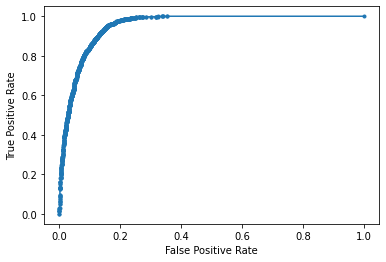

In [ ]:
from sklearn.metrics import auc
ans = auc(fpr1,tpr1)
print(ans)
print("ROC graph for class 1")
plt.plot(fpr1,tpr1,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

0.88575592
ROC graph for class 2


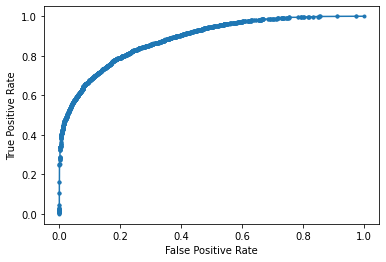

In [ ]:
from sklearn.metrics import auc
ans = auc(fpr2,tpr2)
print(ans)
print("ROC graph for class 2")
plt.plot(fpr2,tpr2,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

0.9125524
ROC graph for class 3


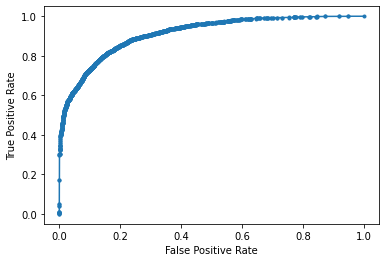

In [ ]:
from sklearn.metrics import auc
ans = auc(fpr3,tpr3)
print(ans)
print("ROC graph for class 3")
plt.plot(fpr3,tpr3,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()